In [1]:
import torch
import torch.nn as nn

from __future__ import print_function
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torchvision 

image_path = '/content/drive/MyDrive/Colab Notebooks/Data/Images/image_data'

transform = transforms.Compose([
    transforms.CenterCrop([178, 178]),
    transforms.Resize([64, 64]),
    transforms.ToTensor(),
])

get_smile = lambda attr: attr[31]

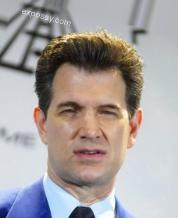

In [3]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/Data/Images/image_data/000015.jpg', width=100)

In [4]:
import torch.nn as nn

model = nn.Sequential()

model.add_module('conv1', nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1))
model.add_module('relu1', nn.ReLU())        
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))  
model.add_module('dropout1', nn.Dropout(p=0.5)) 

model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1))
model.add_module('relu2', nn.ReLU())        
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))   
model.add_module('dropout2', nn.Dropout(p=0.5)) 

model.add_module('conv3', nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1))
model.add_module('relu3', nn.ReLU())        
model.add_module('pool3', nn.MaxPool2d(kernel_size=2))   

model.add_module('conv4', nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1))
model.add_module('relu4', nn.ReLU())  
model.add_module('pool4', nn.AvgPool2d(kernel_size=8)) 
model.add_module('flatten', nn.Flatten()) 
model.add_module('fc', nn.Linear(256, 1)) 
model.add_module('sigmoid', nn.Sigmoid()) 

In [5]:
epsilons = [0.01, 0.1]
pretrained_model = r"/content/drive/MyDrive/Colab Notebooks/Data/celeba-cnn.ph"
use_cuda=True

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device("cpu")

model = model.to(device)
# Load the pretrained model
model.load_state_dict(torch.load(pretrained_model,map_location="cpu").state_dict())
#model = model.to(device)

<All keys matched successfully>

In [6]:
from PIL import Image

image_path = r'/content/drive/MyDrive/Colab Notebooks/Data/Images/image_data/000015.jpg'
im = Image.open(image_path) 

img = transform(im).float()

img_normalized = img.unsqueeze_(0)
img_normalized = img_normalized.to(device)

activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

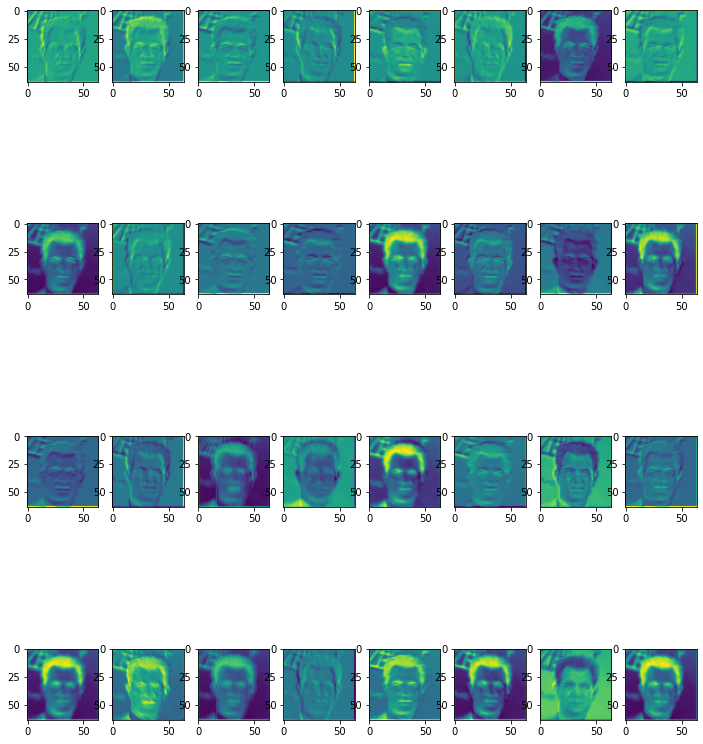

In [7]:
# Conv1 Layer Output
model.conv1.register_forward_hook(get_activation('conv1'))
output = model(img_normalized)

count=0
num_plot = 8
act = activation['conv1'].squeeze()
rows = 4
cols = 8
fig, axarr = plt.subplots(rows, cols, figsize=(12, 15))
for idx1 in range(4):
  for idx2 in range(8):
    axarr[idx1, idx2].imshow(act[count].detach().cpu().numpy())
    count = count + 1

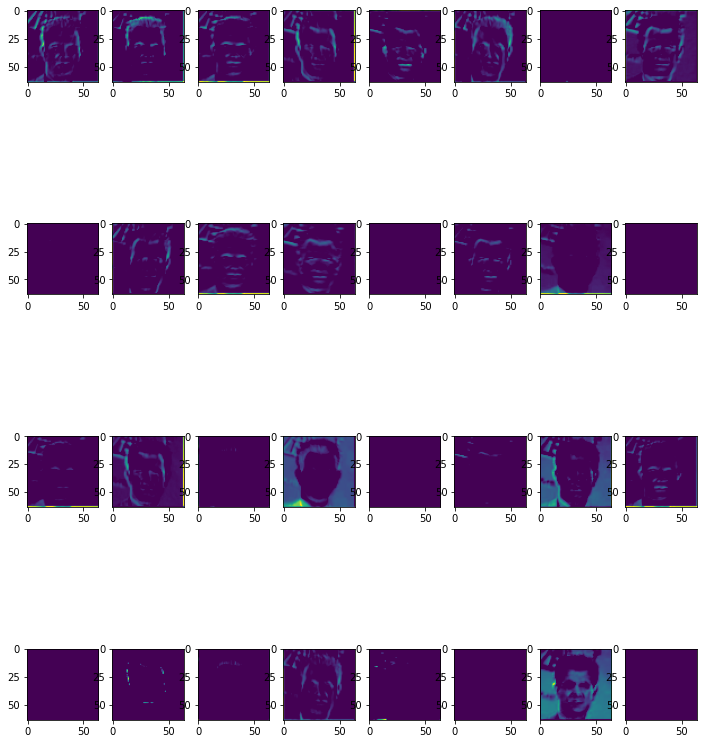

In [8]:
# Relu1 Layer Output
model.relu1.register_forward_hook(get_activation('relu1'))
output = model(img_normalized)

count=0
num_plot = 8
act = activation['relu1'].squeeze()
rows = 4
cols = 8
fig, axarr = plt.subplots(rows, cols, figsize=(12, 15))
for idx1 in range(4):
  for idx2 in range(8):
    axarr[idx1, idx2].imshow(act[count].detach().cpu().numpy())
    count = count + 1

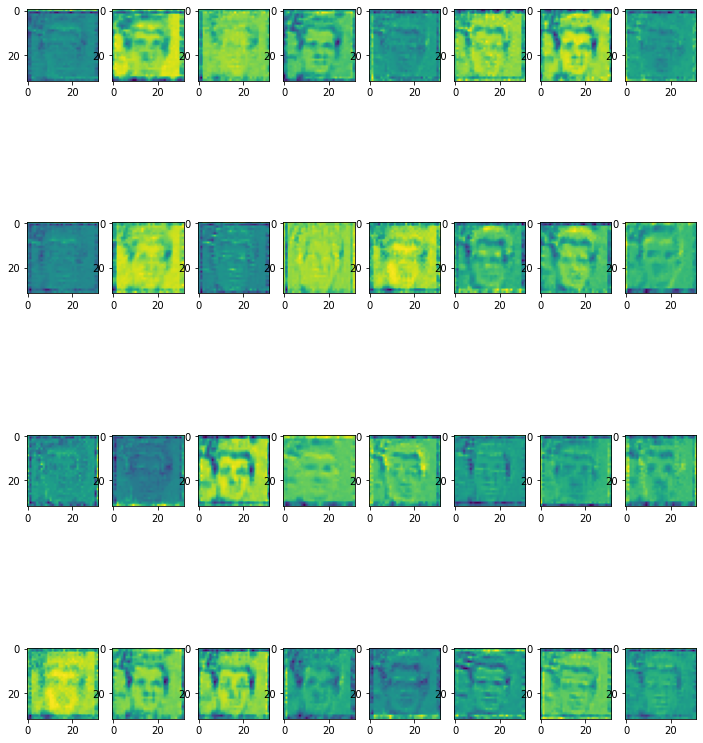

In [9]:
# Conv2 Layer Output
model.conv2.register_forward_hook(get_activation('conv2'))
output = model(img_normalized)

count=0
num_plot = 8
act = activation['conv2'].squeeze()
rows = 4
cols = 8
fig, axarr = plt.subplots(rows, cols, figsize=(12, 15))
for idx1 in range(4):
  for idx2 in range(8):
    axarr[idx1, idx2].imshow(act[count].detach().cpu().numpy())
    count = count + 1

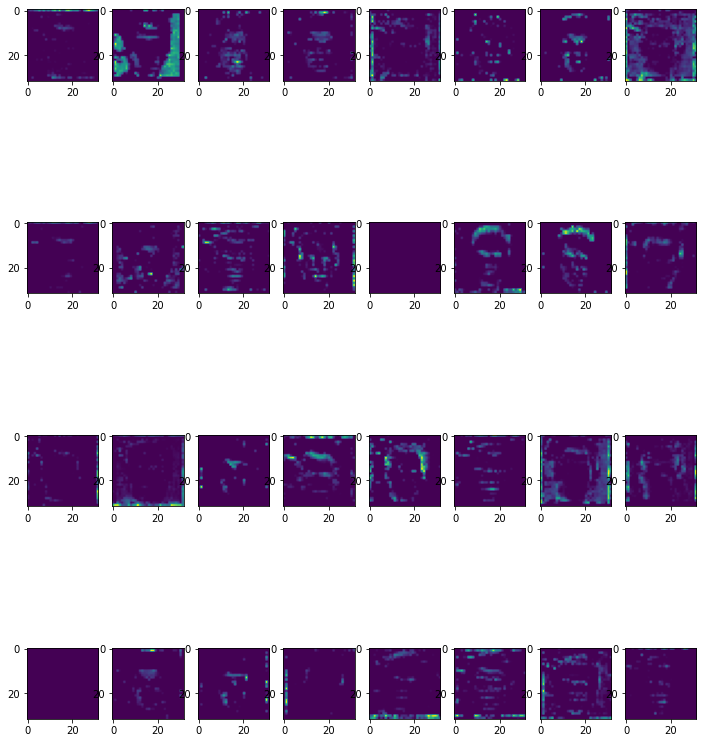

In [10]:
# Relu2 Layer Output
model.relu2.register_forward_hook(get_activation('relu2'))
output = model(img_normalized)

count=0
num_plot = 8
act = activation['relu2'].squeeze()
rows = 4
cols = 8
fig, axarr = plt.subplots(rows, cols, figsize=(12, 15))
for idx1 in range(4):
  for idx2 in range(8):
    axarr[idx1, idx2].imshow(act[count].detach().cpu().numpy())
    count = count + 1

In [11]:
from torchsummary import summary

summary(model, (3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             896
              ReLU-2           [-1, 32, 64, 64]               0
         MaxPool2d-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,496
              ReLU-6           [-1, 64, 32, 32]               0
         MaxPool2d-7           [-1, 64, 16, 16]               0
           Dropout-8           [-1, 64, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]          73,856
             ReLU-10          [-1, 128, 16, 16]               0
        MaxPool2d-11            [-1, 128, 8, 8]               0
           Conv2d-12            [-1, 256, 8, 8]         295,168
             ReLU-13            [-1, 256, 8, 8]               0
        AvgPool2d-14            [-1, 25

In [12]:
dataset = datasets.ImageFolder(r'/content/drive/MyDrive/Colab Notebooks/Data/Images', transform=transform)

In [13]:
dataset

Dataset ImageFolder
    Number of datapoints: 5
    Root location: /content/drive/MyDrive/Colab Notebooks/Data/Images
    StandardTransform
Transform: Compose(
               CenterCrop(size=[178, 178])
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [14]:
model.eval()
model.zero_grad()
for val in range(len(dataset)):
    output = model(dataset[val][0].float().unsqueeze_(0).to(device))
    print(output)
    print(output.round())

tensor([[0.0704]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[0.]], device='cuda:0', grad_fn=<RoundBackward0>)
tensor([[0.6093]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[1.]], device='cuda:0', grad_fn=<RoundBackward0>)
tensor([[0.9939]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[1.]], device='cuda:0', grad_fn=<RoundBackward0>)
tensor([[0.9963]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[1.]], device='cuda:0', grad_fn=<RoundBackward0>)
tensor([[0.0267]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[0.]], device='cuda:0', grad_fn=<RoundBackward0>)


In [15]:
image = Image.open('/content/drive/MyDrive/Colab Notebooks/Data/Images/image_data/000015.jpg')
img_tensor = transform(image).float()

img_normalized_1 = img_tensor.unsqueeze_(0)
img_normalized_1 = img_normalized_1.to(device)

output = model(img_normalized_1)
print(output)
print(output.round())

actual = output.round()

tensor([[0.0704]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[0.]], device='cuda:0', grad_fn=<RoundBackward0>)


In [16]:
loss = nn.BCELoss()

In [17]:
loss_val = loss(output, actual)

In [18]:
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image

In [19]:
criteria = nn.BCELoss()
predicted = []
ground_truth = [0, 1, 1, 1, 0] # Assumed
perturbed_pred = []
perturbed_image = []

for data, _ in dataset:
  
  data = data.float().to(device)
  
  data.unsqueeze_(0)

  data.requires_grad = True
  
  output = model(data.float())
  
  actual = output.round() # Assuming model predictions are right!

  print('Actual Predictions: {}'.format(int(actual.item())))

  predicted.append(actual.item())
  
  loss = criteria(output, actual)
  
  model.zero_grad()
  
  loss.backward()
  
  data_grad = data.grad.data

  epsilon = 2e-1

  perturbed_data = fgsm_attack(data, epsilon, data_grad)

  output_perturbed = model(perturbed_data)

  perturbed_pred.append(output_perturbed.round().item())

  perturbed_image.append(perturbed_data)

  print('Model Predictions on Perturbed data: {}'.format(int(output_perturbed.round().item())))


Actual Predictions: 0
Model Predictions on Perturbed data: 1
Actual Predictions: 1
Model Predictions on Perturbed data: 0
Actual Predictions: 1
Model Predictions on Perturbed data: 0
Actual Predictions: 1
Model Predictions on Perturbed data: 0
Actual Predictions: 0
Model Predictions on Perturbed data: 1


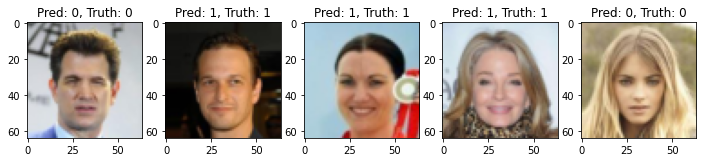

In [20]:
f, axarr = plt.subplots(1,5, figsize=(12,9))
count = 0 
for img, _ in dataset:
  try:
    axarr[count].imshow(img.permute(1, 2, 0))
    axarr[count].set_title('Pred: {}, Truth: {}'.format(int(predicted[count]), int(ground_truth[count])))
    count = count + 1
  except:
    pass

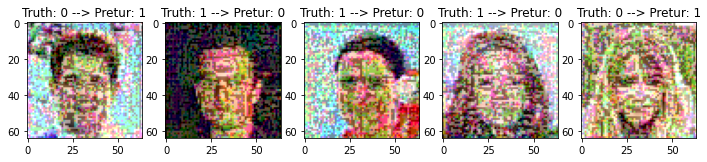

In [21]:
f, axarr = plt.subplots(1,5, figsize=(12,9))
count = 0 
for img in perturbed_image:
    img = torch.squeeze(img)
    img = img.to(device)
    axarr[count].imshow(img.permute(1, 2, 0).detach().cpu().numpy())
    axarr[count].set_title('Truth: {} --> Adver: {}'.format(int(ground_truth[count]), int(perturbed_pred[count])))
    count = count + 1
